In [1]:
%pylab inline
import pandas as pd
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
predictions = dict()
'''
for dset in ['x-fn']: #06
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_z/specificity/trial_5/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly']=topX

for dset in ['f-nx','n-xf']: #06
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_z/specificity/trial_3/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly']=topX


'''
for dset in ['x-fn','f-nx','n-xf']: #06
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_y/specificity/trial1/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly']=topX
    


In [3]:
predictions.keys()

dict_keys(['f-nx_poly', 'x-fn_poly', 'n-xf_poly'])

In [4]:
#Define Dummy Variable Encoding
aminoAcidIndex = 'ACEDGFIHKMLNQPSRTWVY'

def getAAVector(letter):
    vector = np.zeros(20);
    vector[aminoAcidIndex.index(letter)]=1
    return  vector

def encodeWithDummyVariables(sequence):
    newArray=[]
    for aa in sequence:
        newArray.append(getAAVector(aa))
    return np.array(newArray).ravel()

In [5]:
predictionSource = []
allSeqs = []

for each in ['x-fn_poly', 'n-xf_poly','f-nx_poly']:
    allSeqs.extend(predictions[each])
    predictionSource.extend([each]*len(predictions[each]))

In [6]:
predictionDF = pd.DataFrame({'seq':allSeqs,'source':predictionSource})

In [7]:
predictionDF[predictionDF['seq'].str.contains('set')]

,seq,source


In [8]:
cleanPrediction = predictionDF[~predictionDF['seq'].str.contains('set')].copy()

In [9]:

myMatrix = np.array([encodeWithDummyVariables(k) for k in cleanPrediction.seq])


for dset in ['s','t','m','x','f','n']:

    polyModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modelpolyall_"+dset+".pickle",'rb'))
    linearModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modellinearall_"+dset+".pickle",'rb'))


    cleanPrediction[dset+'_poly'] = polyModel.predict(myMatrix)
    cleanPrediction[dset+'_linear'] = linearModel.predict(myMatrix)

    

In [10]:
for dset in ['m','x','f']:

    polyModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modelpolycomboall_"+dset+".pickle",'rb'))
    linearModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modellinearcomboall_"+dset+".pickle",'rb'))


    cleanPrediction[dset+'_combo_poly'] = polyModel.predict(myMatrix)
    cleanPrediction[dset+'_combo_linear'] = linearModel.predict(myMatrix)


In [11]:
cleanPrediction.head()

,seq,source,s_poly,s_linear,t_poly,t_linear,m_poly,m_linear,x_poly,x_linear,f_poly,f_linear,n_poly,n_linear,m_combo_poly,m_combo_linear,x_combo_poly,x_combo_linear,f_combo_poly,f_combo_linear
0,GQTLIWYGASLRRYADEFAKQR,x-fn_poly,-11.623811,-11.392235,-9.765269,-9.790501,-10.067174,-9.451682,-11.581698,-11.767888,-9.490422,-9.492428,-9.418810,-9.474242,-9.646338,-9.494080,-11.881124,-11.754872,-9.479089,-9.734037
1,GRPLIWYGASLRRYADEFAKQR,x-fn_poly,-11.696594,-11.181596,-9.798453,-9.765113,-10.053781,-9.646733,-11.561466,-11.496584,-9.438120,-9.523236,-9.457921,-9.343946,-9.775629,-9.503937,-11.962857,-11.408547,-9.564788,-9.686607
2,GQPLIWYGASLRRYADEFAKYR,x-fn_poly,-11.696594,-11.181596,-9.798453,-9.765113,-10.053781,-9.646733,-11.561466,-11.496584,-9.438120,-9.523236,-9.457921,-9.343946,-9.775629,-9.503937,-11.962857,-11.408547,-9.564788,-9.686607
3,GQPLIWYGQSLRRYADEFAKQR,x-fn_poly,-11.696594,-11.181596,-9.798453,-9.765113,-10.053781,-9.646733,-11.561466,-11.496584,-9.438120,-9.523236,-9.457921,-9.343946,-9.775629,-9.503937,-11.962857,-11.408547,-9.564788,-9.686607
4,GQRLRWYGASLRRYADEFAKQR,x-fn_poly,-11.488257,-11.199856,-9.721975,-9.651725,-10.239647,-9.389466,-11.482576,-11.478926,-9.498045,-9.566761,-9.384945,-9.157960,-9.723415,-9.256376,-11.907862,-11.414836,-9.401303,-9.627487


In [12]:
max(cleanPrediction[cleanPrediction.source=='x-fn_poly'].x_poly)

-11.359300021340227

In [13]:
import re

def getColor(source):
    myIndex = ['n','f','x']
    myRGB = [0,0,0,0.2]
    
    if(bool(re.findall('-',source))):
        target = re.split('-',source)[0]
        for i in target:
            myRGB[myIndex.index(i)]=1
            
    else:
        myRGB[myIndex.index(source[0])]=1
        
    if(bool(re.findall('poly',source))):
        myRGB[3]=1
        
    return matplotlib.colors.colorConverter.to_rgba(myRGB)

In [14]:
cleanPrediction['color'] = cleanPrediction.apply(lambda x: getColor(x['source']),axis=1)

In [15]:
cleanPrediction['colorhex'] = cleanPrediction.apply(lambda x : matplotlib.colors.rgb2hex(x['color']),axis=1)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/AdditiveColor.svg/1024px-AdditiveColor.svg.png", width=400>

In [16]:
def plotDotted(ax):
    ax.plot([-16,-4],[-16,-4])


    ax.plot([-16-tenFold,-4-tenFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')
    ax.plot([-16+tenFold,-4+tenFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')

    ax.plot([-16-hundredFold,-4-hundredFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')
    ax.plot([-16+hundredFold,-4+hundredFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')

    ax.plot([-16-thouFold,-4-thouFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')
    ax.plot([-16+thouFold,-4+thouFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')

    ax.vlines(-10.9085,-16,-4,linestyles ='-.',color='grey')
    ax.hlines(-10.9085,-16,-4,linestyles ='-.',color='grey')

    ax.vlines(-9.5,-16,-4,linestyles ='-.',color='grey')
    ax.hlines(-9.5,-16,-4,linestyles ='-.',color='grey')



In [17]:
plotSubsetData = cleanPrediction[cleanPrediction.source.str.contains("x-fn|f-nx|n-xf")].copy()

In [18]:
import seaborn as sb

In [19]:
def kcalToKD(i):
    return np.e**(i/ ((1.9872041 * 10**-3)  * (298))) * 10**9

def kdTokcal(i):
    return (1.9872041 * 10**-3)  * (298) * np.log( i/ 10**9)

In [20]:
twoFold = kdTokcal(200) -kdTokcal(100)
tenFold = kdTokcal(2000) -kdTokcal(200)
hundredFold = kdTokcal(20000) -kdTokcal(200)
thouFold = kdTokcal(200000) -kdTokcal(200)

In [21]:
plotSubsetData['xMean'] = plotSubsetData[['s_linear','s_poly','x_linear','x_poly']].mean(axis=1)
plotSubsetData['mMean'] = plotSubsetData[['m_linear','m_poly','n_linear','n_poly']].mean(axis=1)
plotSubsetData['fMean'] = plotSubsetData[['t_linear','t_poly','f_linear','f_poly']].mean(axis=1)

In [22]:
def getXSpec(row):
    return mean([(row.mMean-row.xMean),(row.fMean-row.xMean)])
def getFSpec(row):
    return mean([(row.xMean-row.fMean),(row.mMean-row.fMean)])
def getMSpec(row):
    return mean([(row.xMean-row.mMean),(row.fMean-row.mMean)])    

In [23]:
#Find out the minimal distance in the specificity space.

plotSubsetData['xSpec'] = plotSubsetData.apply(lambda x: getXSpec(x),axis=1)
plotSubsetData['mSpec'] = plotSubsetData.apply(lambda x: getMSpec(x),axis=1)
plotSubsetData['fSpec'] = plotSubsetData.apply(lambda x: getFSpec(x),axis=1)

In [24]:
topX = plotSubsetData[plotSubsetData['source'].str.contains('x-fn_poly')].sort_values(by='xSpec').tail(12)
topM = plotSubsetData[plotSubsetData['source'].str.contains('n-xf_poly')].sort_values(by='mSpec').tail(12)
topF = plotSubsetData[plotSubsetData['source'].str.contains('f-nx_poly')].sort_values(by='fSpec').tail(12)

In [25]:
topF[['m_linear','m_poly','n_linear','n_poly','fSpec']]

,m_linear,m_poly,n_linear,n_poly,fSpec
443,-10.573088,-10.034617,-10.519184,-9.344348,1.484600
435,-10.698895,-10.118778,-10.481691,-9.370151,1.496162
492,-10.591016,-9.882300,-10.418318,-9.199720,1.501375
579,-10.284437,-9.834781,-10.341569,-9.444835,1.542593
578,-10.284437,-9.834781,-10.341569,-9.444835,1.542593
580,-10.284437,-9.834781,-10.341569,-9.444835,1.542593
482,-10.158631,-9.746328,-10.379062,-9.439686,1.558940
481,-10.158631,-9.746328,-10.379062,-9.439686,1.558940
480,-10.158631,-9.746328,-10.379062,-9.439686,1.558940
477,-10.231040,-9.680613,-10.420893,-9.312399,1.568769


In [26]:
topDesigns = pd.concat([topX,topM,topF])

In [27]:
def plotGrid(x,y,x2,y2,x3,y3,thisTitle):
    rangeMin = -14
    rangeMax = -7

    fig,ax = plt.subplots(3,2,figsize=(20,30))
    ax[0][0].scatter(plotSubsetData[x+'_linear'],plotSubsetData[y+'_linear'],c=list(plotSubsetData['color']))
    ax[0][0].set_xlabel(x + " Linear")
    ax[0][0].set_ylabel(y + " Linear")
    plotDotted(ax[0][0])
    ax[0][0].set_xlim(rangeMin,rangeMax)
    ax[0][0].set_ylim(rangeMin,rangeMax)

    ax[0][1].scatter(plotSubsetData[x+'_poly'],plotSubsetData[y+'_poly'],c=list(plotSubsetData['color']))
    ax[0][1].set_xlabel(x + " Poly")
    ax[0][1].set_ylabel(y + " Poly")
    plotDotted(ax[0][1])
    ax[0][1].set_xlim(rangeMin,rangeMax)
    ax[0][1].set_ylim(rangeMin,rangeMax)

    ax[1][0].scatter(plotSubsetData[x2+'_linear'],plotSubsetData[y2+'_linear'],c=list(plotSubsetData['color']))
    ax[1][0].set_xlabel(x2 + " Linear")
    ax[1][0].set_ylabel(y2 + " Linear")
    plotDotted(ax[1][0])
    ax[1][0].set_xlim(rangeMin,rangeMax)
    ax[1][0].set_ylim(rangeMin,rangeMax)

    ax[1][1].scatter(plotSubsetData[x2+'_poly'],plotSubsetData[y2+'_poly'],c=list(plotSubsetData['color']))
    ax[1][1].set_xlabel(x2 + " Poly")
    ax[1][1].set_ylabel(y2 + " Poly")
    plotDotted(ax[1][1])
    ax[1][1].set_xlim(rangeMin,rangeMax)
    ax[1][1].set_ylim(rangeMin,rangeMax)

    
    ax[2][0].scatter(plotSubsetData[x3+'_linear'],plotSubsetData[y3+'_linear'],c=list(plotSubsetData['color']))
    ax[2][0].set_xlabel(x3 + " Linear")
    ax[2][0].set_ylabel(y3 + " Linear")
    plotDotted(ax[2][0])
    ax[2][0].set_xlim(rangeMin,rangeMax)
    ax[2][0].set_ylim(rangeMin,rangeMax)

    ax[2][1].scatter(plotSubsetData[x3+'_poly'],plotSubsetData[y3+'_poly'],c=list(plotSubsetData['color']))
    ax[2][1].set_xlabel(x3 + " Poly")
    ax[2][1].set_ylabel(y3 + " Poly")
    plotDotted(ax[2][1])
    ax[2][1].set_xlim(rangeMin,rangeMax)
    ax[2][1].set_ylim(rangeMin,rangeMax)
    

    plt.setp(ax, xticks=range(rangeMin,rangeMax), xticklabels = ["%0.3f \n%d"  % (kcalToKD(i),i) for i in range(rangeMin,rangeMax)],
                 yticks=range(rangeMin,rangeMax), yticklabels = ["%0.3f \n%d"  % (kcalToKD(i),i) for i in range(rangeMin,rangeMax)])
    print()
    suptitle(thisTitle, size=30,y=1.05)

    ax[0][0].scatter(topDesigns[x+'_linear'],topDesigns[y+'_linear'],c=list(topDesigns['color']),s=400,marker='^')
    ax[0][1].scatter(topDesigns[x+'_poly'],topDesigns[[y+'_poly']],c=list(topDesigns['color']),s=400,marker='^')
    ax[1][0].scatter(topDesigns[x2+'_linear'],topDesigns[y2+'_linear'],c=list(topDesigns['color']),s=400,marker='^')
    ax[1][1].scatter(topDesigns[x2+'_poly'],topDesigns[[y2+'_poly']],c=list(topDesigns['color']),s=400,marker='^')
    ax[2][0].scatter(topDesigns[x3+'_linear'],topDesigns[y3+'_linear'],c=list(topDesigns['color']),s=400,marker='^')
    ax[2][1].scatter(topDesigns[x3+'_poly'],topDesigns[[y3+'_poly']],c=list(topDesigns['color']),s=400,marker='^')
    plt.tight_layout()


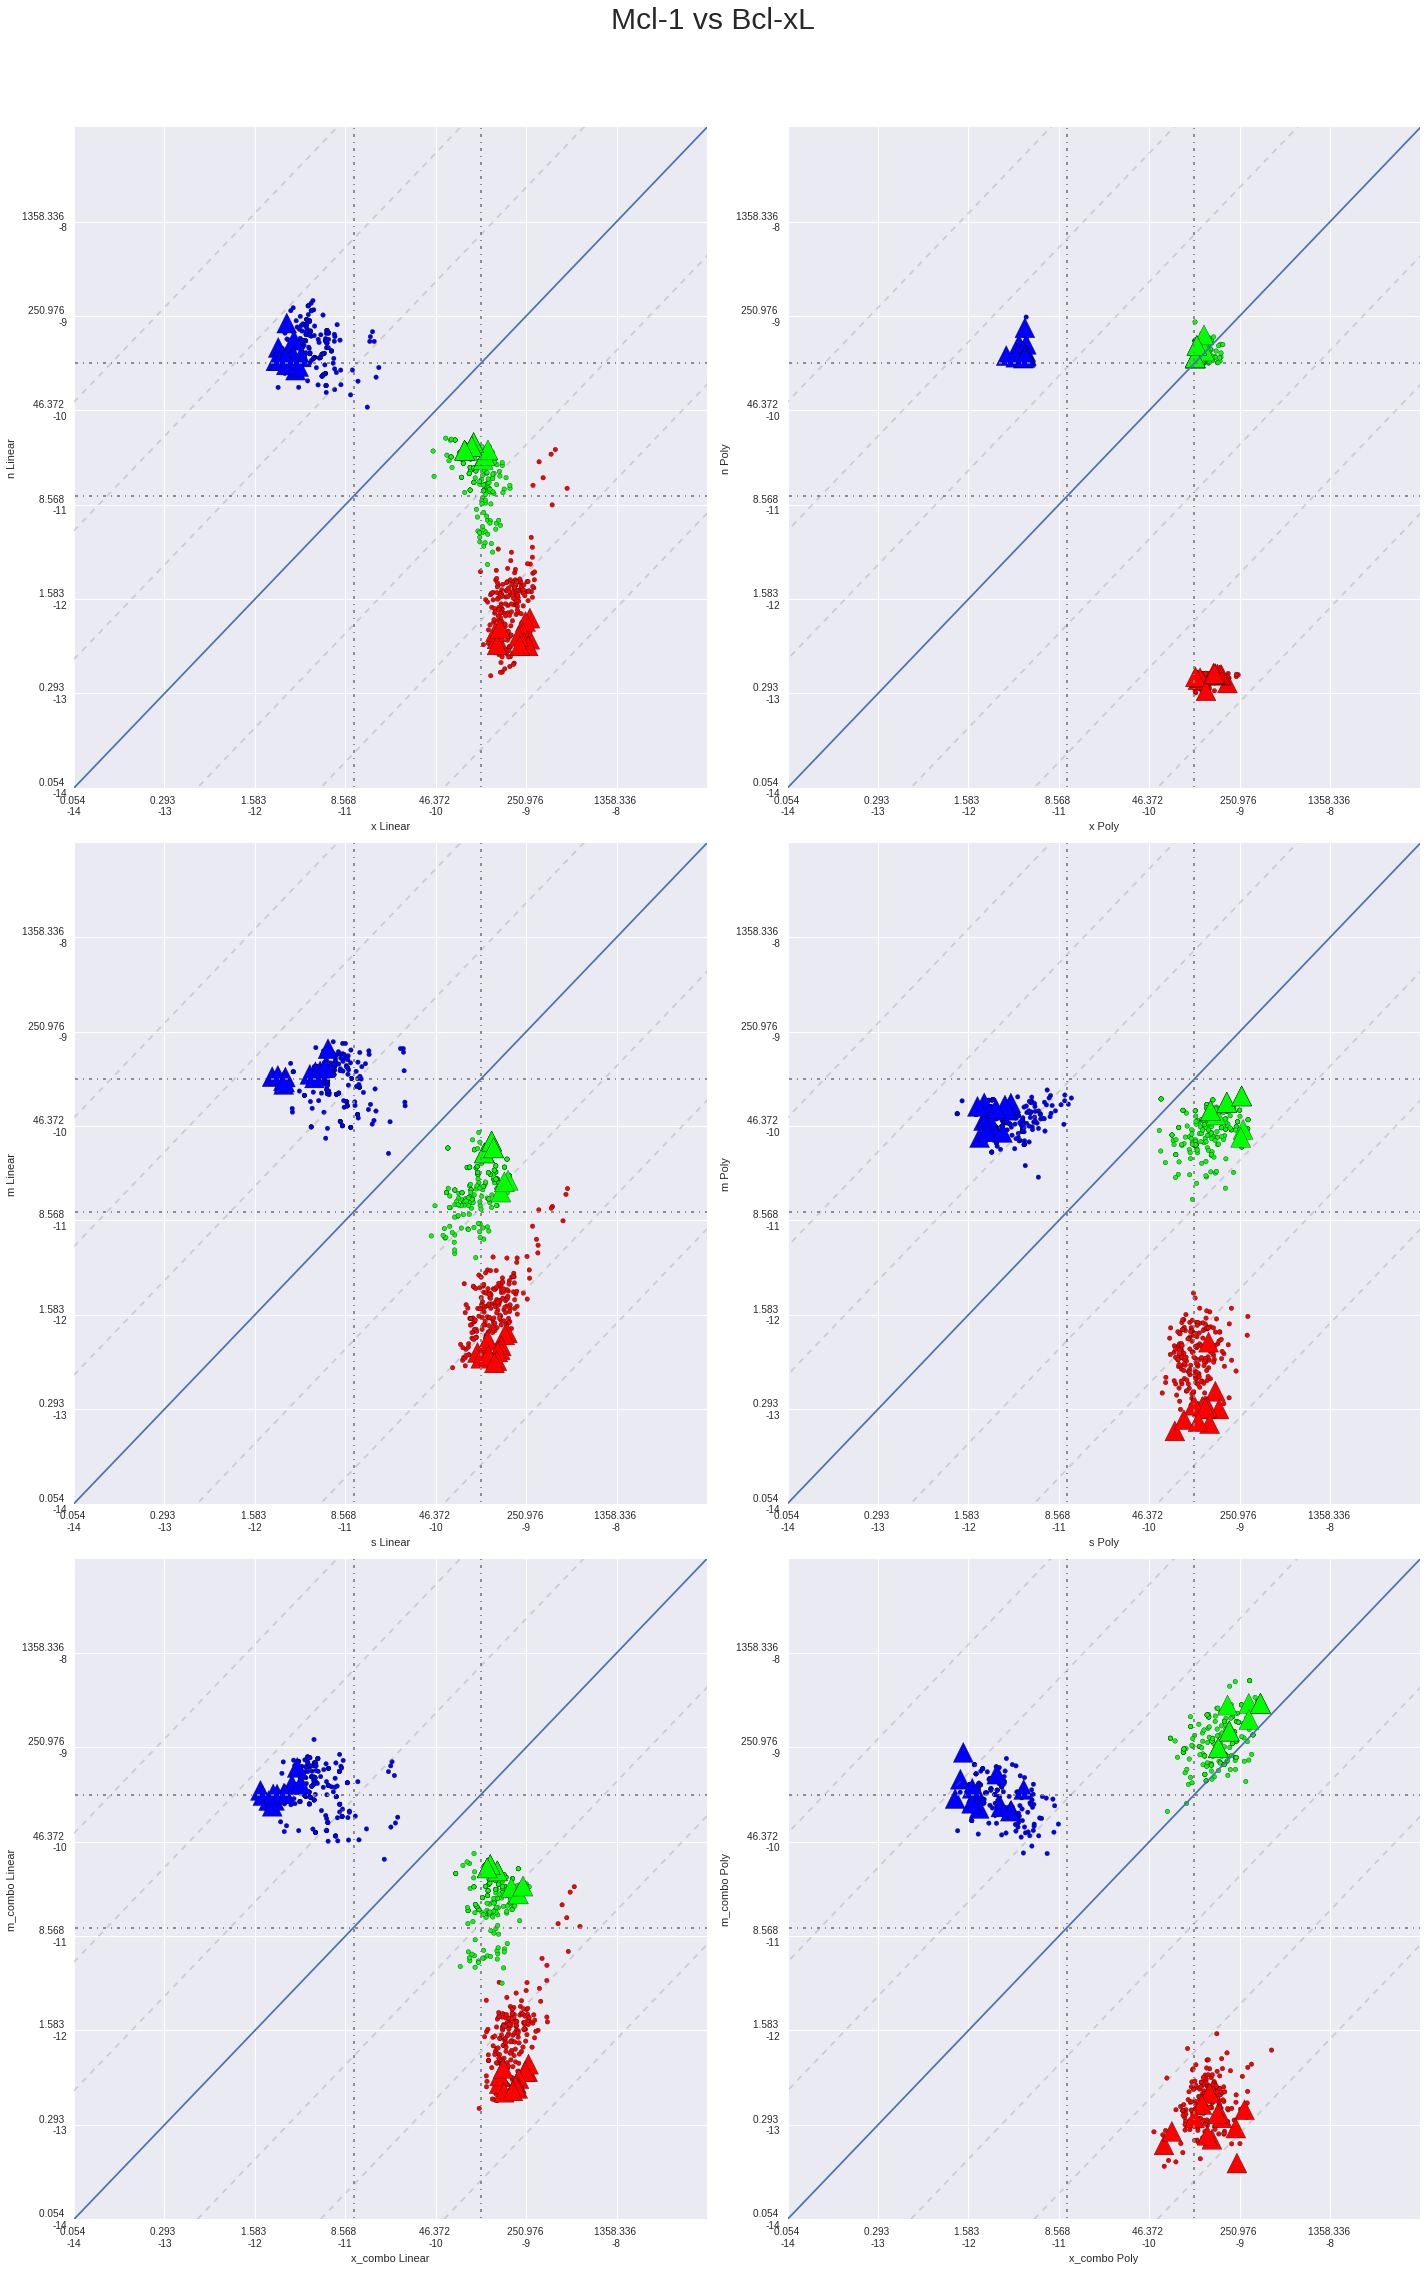

In [28]:

plotGrid('x','n','s','m','x_combo','m_combo',"Mcl-1 vs Bcl-xL")

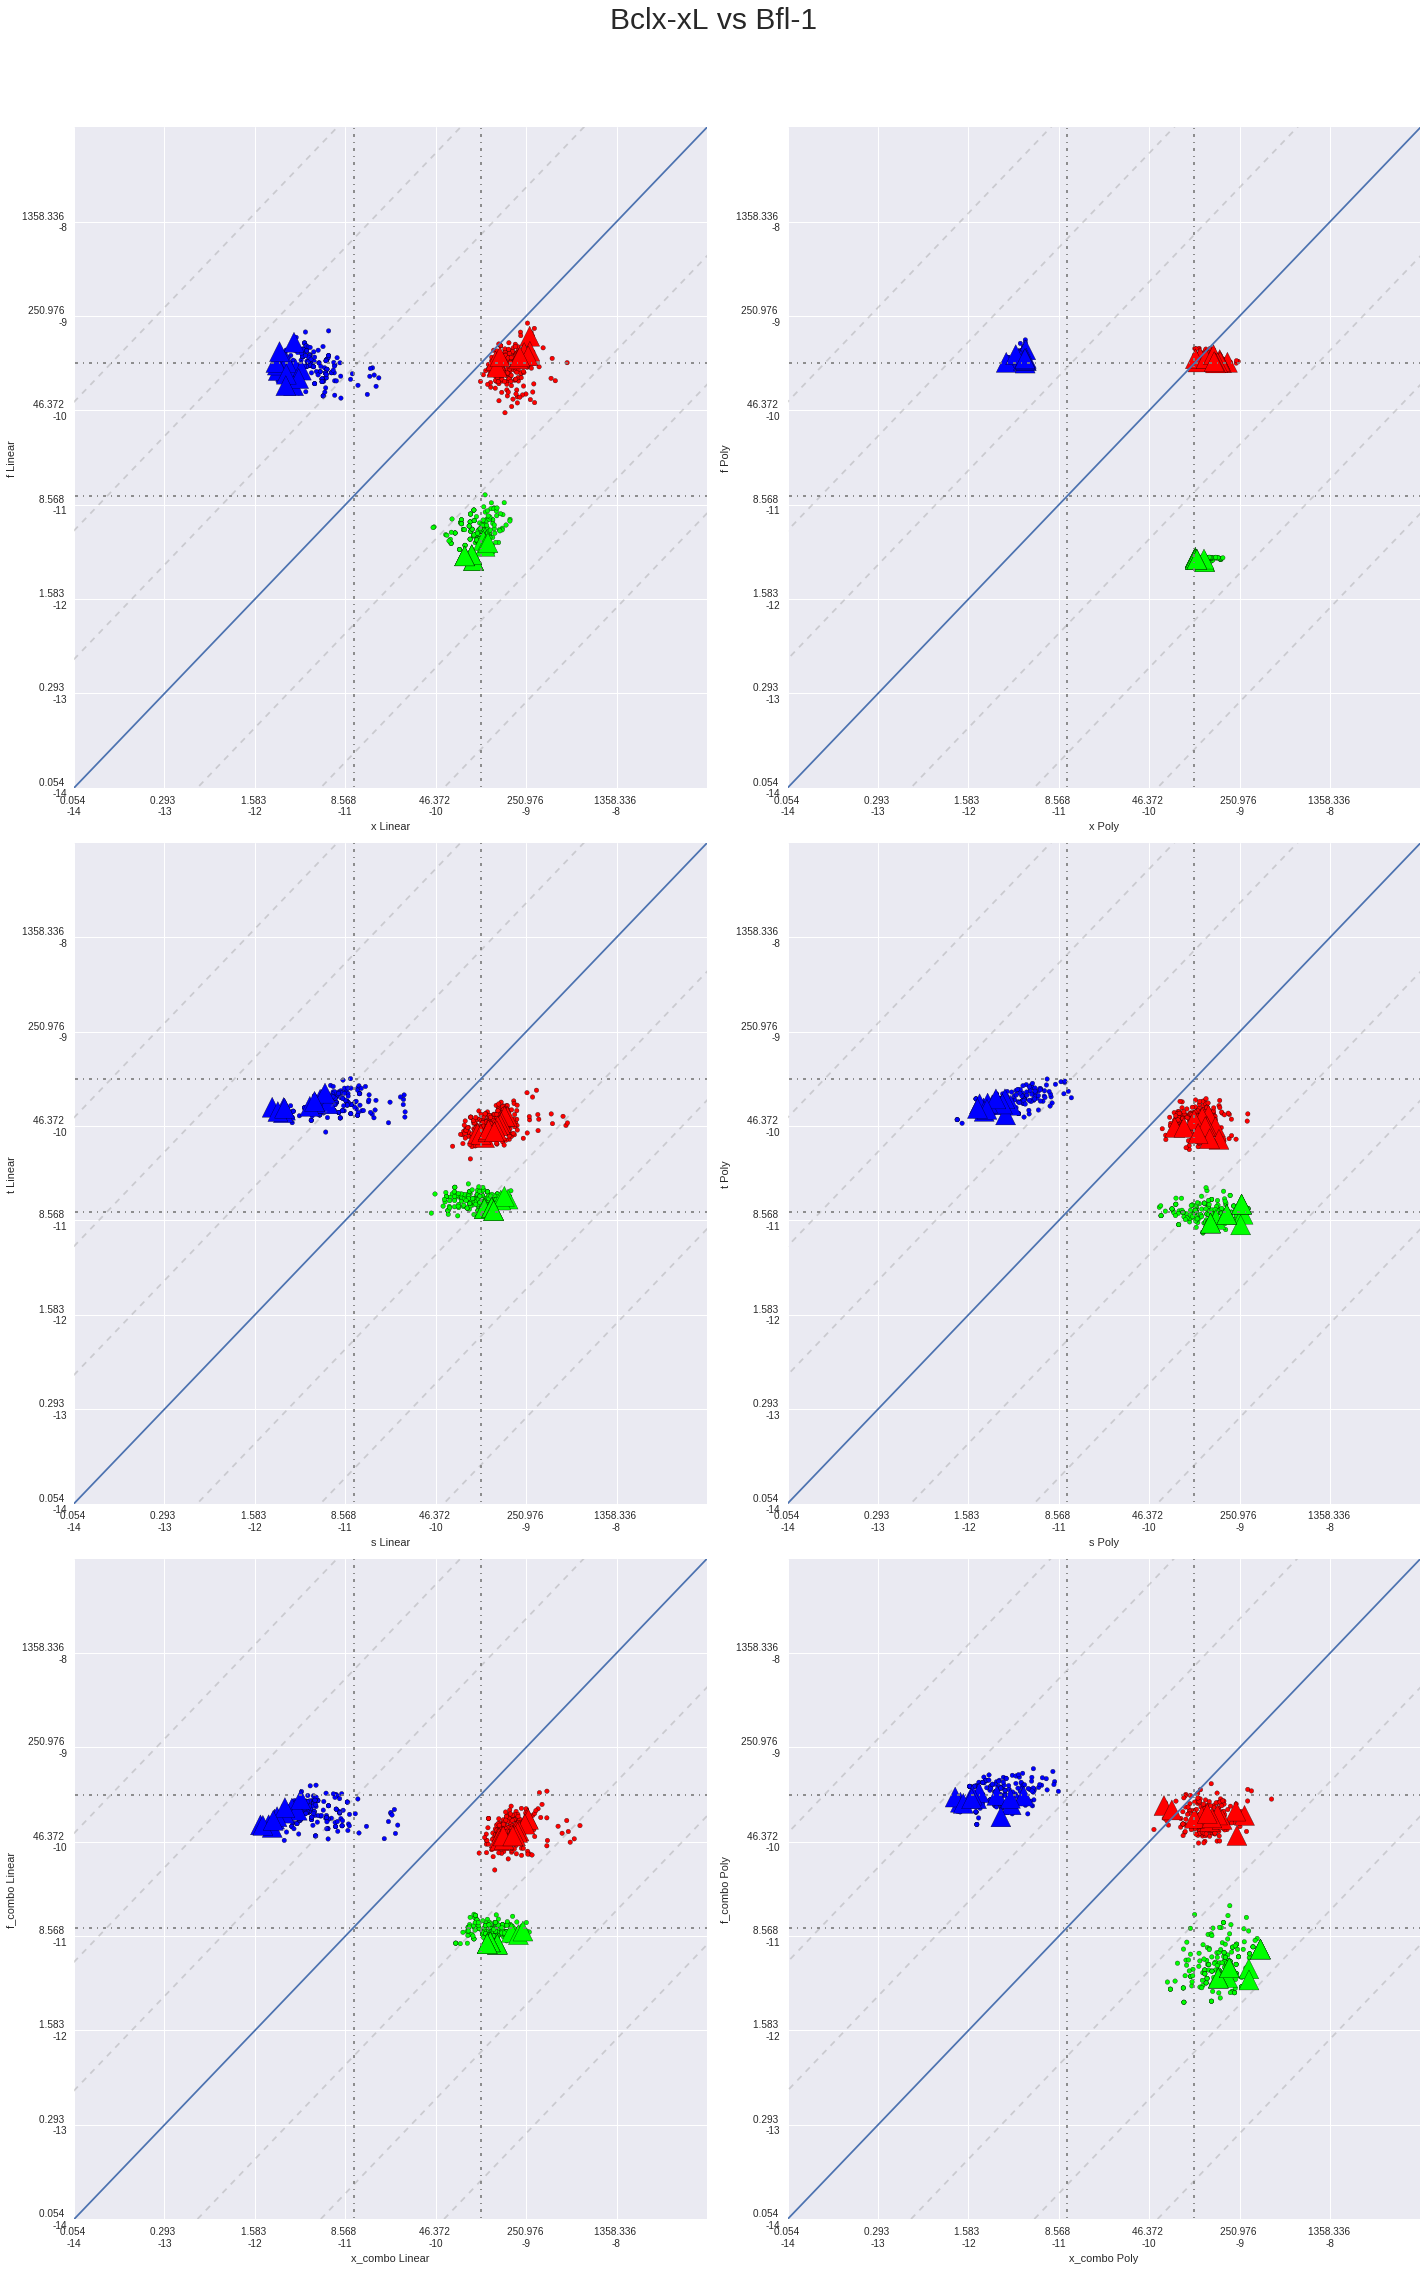

In [29]:
plotGrid('x','f','s','t','x_combo','f_combo',"Bclx-xL vs Bfl-1")

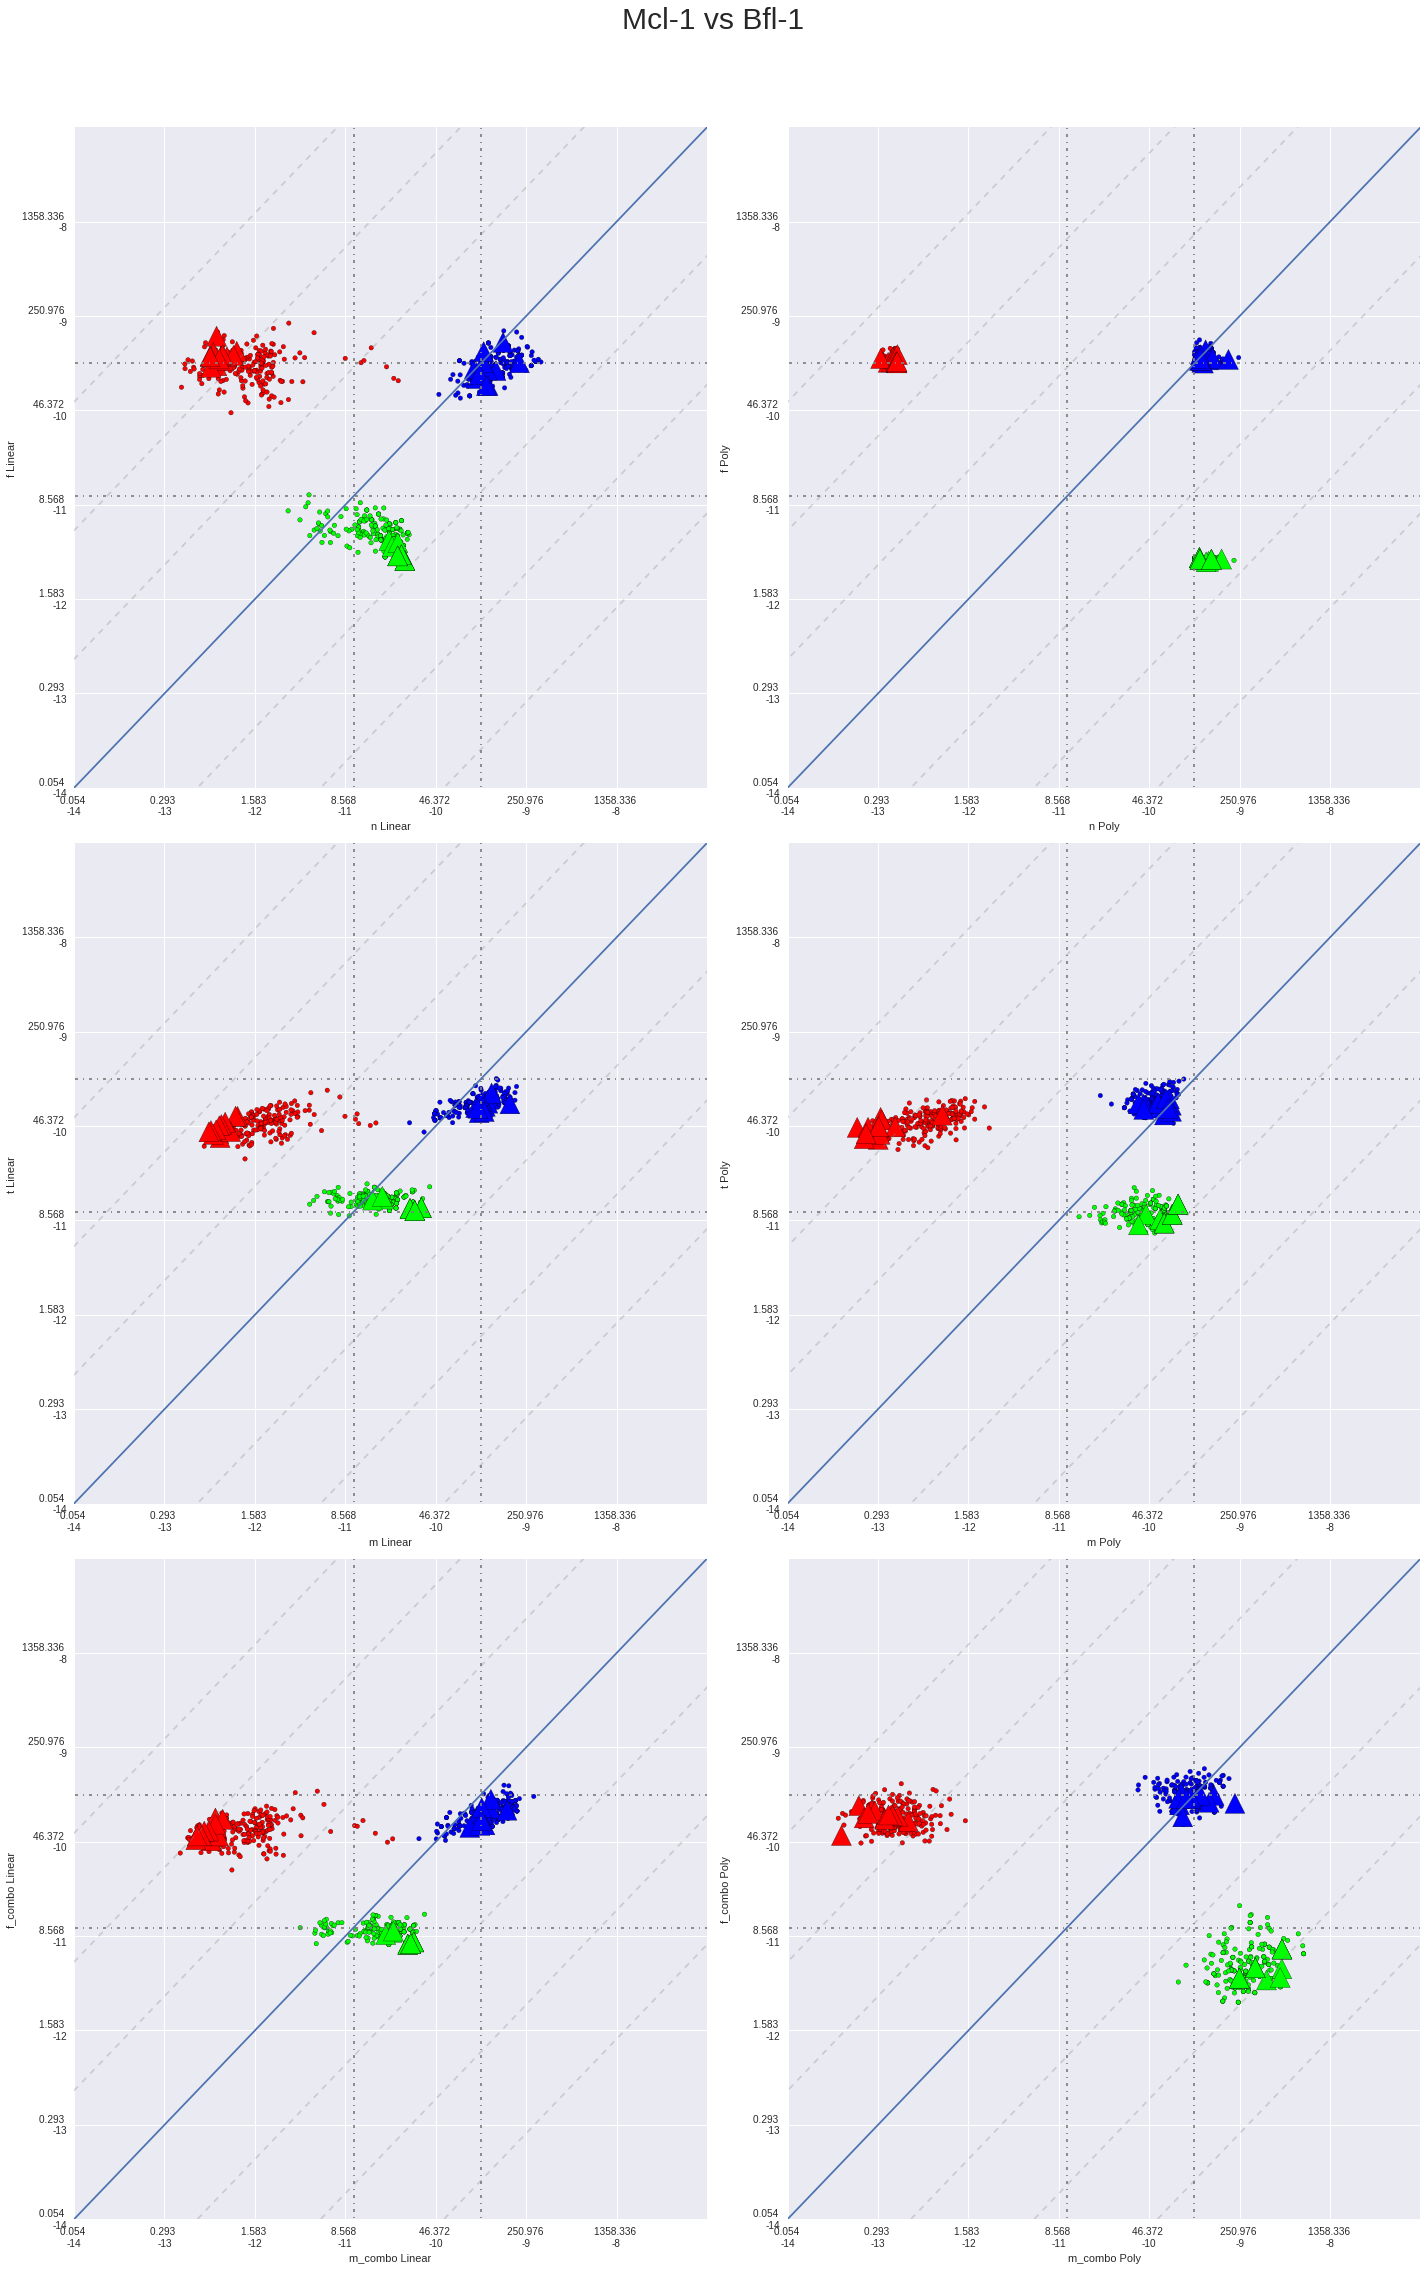

In [30]:
plotGrid('n','f','m','t','m_combo','f_combo',"Mcl-1 vs Bfl-1")

In [31]:
# %load ../PyScripts/makeLogoFromList.py
#SVM_Ranking_29
from weblogolib import *
from IPython.display import Image


def makeLogoFromList(sequences):
    myFile = open("/tmp/seqlogo",'w')
    count = 0
    for each in sequences:
        if("*" not in each and "X" not in each):
            myFile.write(each+"\n")
            #myFile.write("\n")
        count+=1
        #if (count>10000):
        #    break
    myFile.close()
    
    myFile=open("/tmp/seqlogo",'r')
    seqs = read_seq_data(myFile)
    data = LogoData.from_seqs(seqs)
    options = LogoOptions()
    options.fineprint=""
    options.resolution=300
    options.fontsize=8
    options.unit_name="bits"
    myFormat = LogoFormat(data, options)
    return png_formatter(data,myFormat)

temp = makeLogoFromList(['AATCGA'])
myFile=open("/tmp/seqlogo",'r')
seqs = read_seq_data(myFile)   
data = LogoData.from_seqs(seqs)


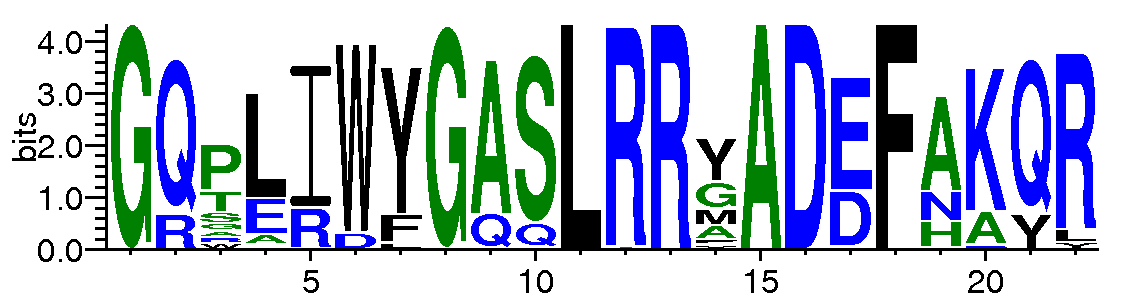

In [32]:
Image(makeLogoFromList(cleanPrediction[cleanPrediction.source.str.contains("x-fn_poly")].seq))

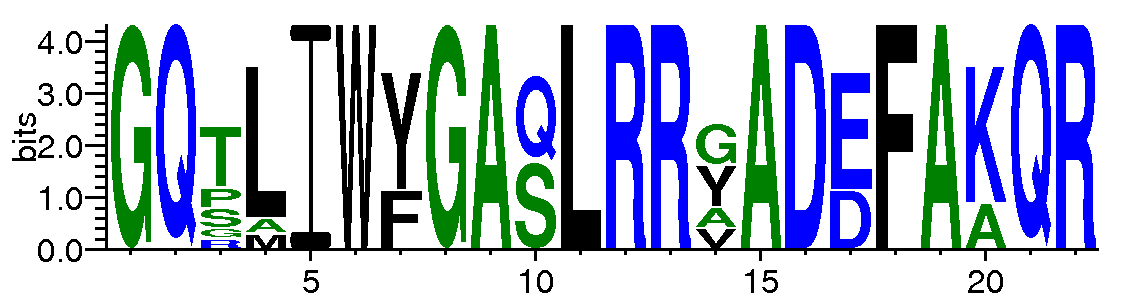

In [33]:
Image(makeLogoFromList(topX.seq))

In [78]:
myMatrix = np.array([encodeWithDummyVariables(x) for x in topX.seq])
np.triu(myMatrix.dot(myMatrix.T),1).astype(int)

array([[ 0, 17, 18, 17, 20, 20, 17, 16, 21, 21, 21, 17],
       [ 0,  0, 18, 20, 17, 19, 18, 20, 17, 17, 18, 20],
       [ 0,  0,  0, 18, 17, 20, 20, 17, 17, 18, 19, 16],
       [ 0,  0,  0,  0, 16, 19, 17, 21, 16, 17, 18, 20],
       [ 0,  0,  0,  0,  0, 18, 17, 16, 20, 21, 19, 17],
       [ 0,  0,  0,  0,  0,  0, 19, 18, 19, 19, 21, 17],
       [ 0,  0,  0,  0,  0,  0,  0, 18, 17, 17, 18, 16],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16, 16, 17, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20, 20, 17],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20, 17],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [80]:
foo = 22-myMatrix.dot(myMatrix.T)
foo[foo==0]=np.nan
np.nanmean(foo)

3.7727272727272729

In [81]:
topX.seq

170    GQTLIWYGAQLRRYADDFAKQR
12     GQPLIWFGASLRRGADEFAKQR
37     GQTAIWYGASLRRAADEFAKQR
196    GQTLIWFGASLRRGADEFAAQR
197    GQGLIWYGAQLRRVADDFAKQR
0      GQTLIWYGASLRRYADEFAKQR
145    GQSMIWYGASLRRAADEFAKQR
84     GQSLIWFGASLRRGADEFAAQR
176    GQRLIWYGAQLRRYADDFAKQR
131    GQTLIWYGAQLRRVADDFAKQR
5      GQTLIWYGAQLRRYADEFAKQR
136    GQPLIWFGAQLRRGADEFAAQR
Name: seq, dtype: object

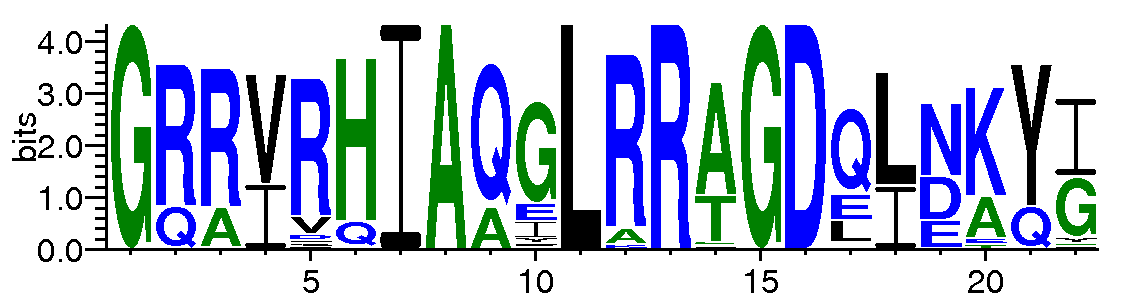

In [36]:
Image(makeLogoFromList(cleanPrediction[cleanPrediction.source.str.contains("f-nx_poly")].seq))

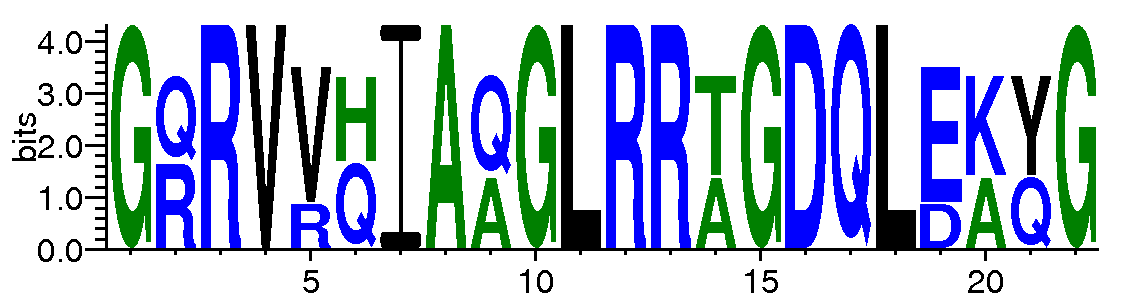

In [37]:
Image(makeLogoFromList(topF.seq))

In [75]:
myMatrix = np.array([encodeWithDummyVariables(x) for x in topF.seq])
np.triu(myMatrix.dot(myMatrix.T),1).astype(int)

array([[ 0, 20, 19, 17, 15, 15, 15, 17, 17, 19, 19, 17],
       [ 0,  0, 21, 17, 17, 17, 15, 15, 15, 17, 17, 17],
       [ 0,  0,  0, 18, 18, 18, 16, 16, 16, 16, 16, 16],
       [ 0,  0,  0,  0, 20, 20, 18, 20, 20, 18, 18, 16],
       [ 0,  0,  0,  0,  0, 20, 20, 18, 20, 16, 18, 18],
       [ 0,  0,  0,  0,  0,  0, 20, 20, 18, 18, 16, 18],
       [ 0,  0,  0,  0,  0,  0,  0, 20, 20, 18, 18, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20, 20, 18, 18],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 18, 20, 18],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [76]:
foo = 22-myMatrix.dot(myMatrix.T)
foo[foo==0]=np.nan
np.nanmean(foo)

4.0303030303030303

In [77]:
topF.seq

443    GQRVRHIAQGLRRTGDQLDAYG
435    GRRVRHIAQGLRRAGDQLDAYG
492    GRRVRHIAQGLRRAGDQLDKYG
579    GQRVVQIAQGLRRAGDQLEKYG
578    GRRVVQIAAGLRRAGDQLEKYG
580    GRRVVQIAQGLRRAGDQLEKQG
482    GRRVVQIAAGLRRTGDQLEKQG
481    GQRVVQIAQGLRRTGDQLEKQG
480    GQRVVQIAAGLRRTGDQLEKYG
477    GQRVVHIAQGLRRTGDQLEAQG
476    GQRVVHIAAGLRRTGDQLEAYG
475    GRRVVHIAAGLRRTGDQLEAQG
Name: seq, dtype: object

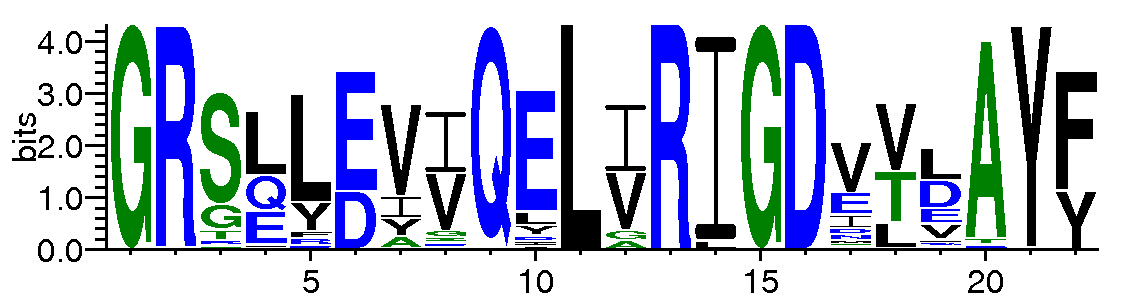

In [40]:
Image(makeLogoFromList(cleanPrediction[cleanPrediction.source.str.contains("n-xf_poly")].seq))

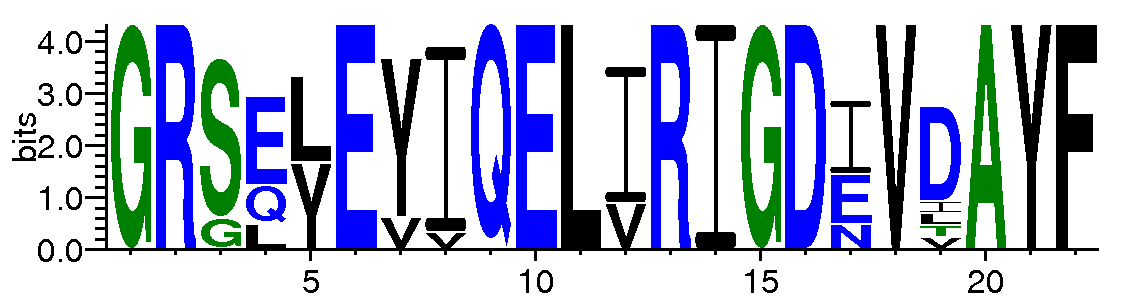

In [41]:
Image(makeLogoFromList(topM.seq))

In [69]:
myMatrix = np.array([encodeWithDummyVariables(x) for x in topM.seq])
np.triu(myMatrix.dot(myMatrix.T),1).astype(int)

array([[ 0, 16, 17, 15, 16, 18, 15, 17, 18, 17, 16, 17],
       [ 0,  0, 18, 20, 18, 19, 17, 19, 19, 17, 18, 18],
       [ 0,  0,  0, 19, 17, 21, 18, 19, 19, 17, 20, 20],
       [ 0,  0,  0,  0, 17, 18, 18, 18, 18, 18, 19, 19],
       [ 0,  0,  0,  0,  0, 18, 21, 19, 20, 18, 18, 19],
       [ 0,  0,  0,  0,  0,  0, 17, 20, 20, 16, 19, 19],
       [ 0,  0,  0,  0,  0,  0,  0, 18, 19, 19, 19, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21, 17, 21, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 18, 20, 21],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18, 19],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [74]:
foo = 22-myMatrix.dot(myMatrix.T)
foo[foo==0]=np.nan
np.nanmean(foo)

3.5909090909090908

In [43]:
topM.seq

232    GRSELEVVQELVRIGDIVVAYF
251    GRSLLEYIQELIRIGDEVIAYF
288    GRSEYEYIQELVRIGDEVDAYF
303    GRSLYEYIQELIRIGDEVTAYF
336    GRGQLEYIQELIRIGDIVDAYF
206    GRSELEYIQELVRIGDEVDAYF
396    GRGQYEYIQELIRIGDIVDAYF
345    GRSELEYIQELIRIGDNVDAYF
349    GRSELEYIQELIRIGDIVDAYF
366    GRSQYEVIQELIRIGDIVLAYF
382    GRSEYEYIQELIRIGDNVDAYF
384    GRSEYEYIQELIRIGDIVDAYF
Name: seq, dtype: object

(-13, -7)

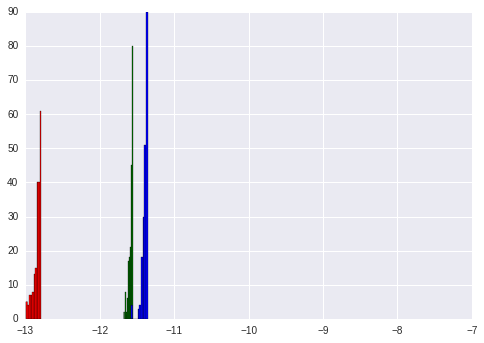

In [44]:
figure()
hist(plotSubsetData[plotSubsetData.source=='f-nx_poly'].f_poly,color='green')
hist(plotSubsetData[plotSubsetData.source=='x-fn_poly'].x_poly,color='blue')
hist(plotSubsetData[plotSubsetData.source=='n-xf_poly'].n_poly,color='red')
xlim(-13,-7)

(-13, -7)

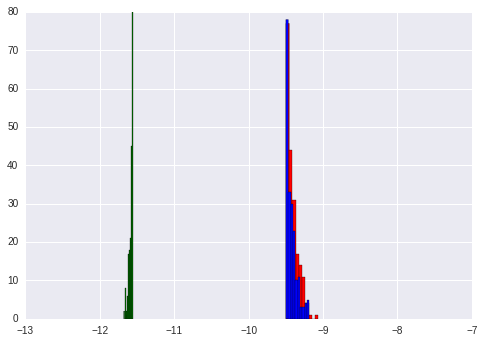

In [45]:
figure()
hist(plotSubsetData[plotSubsetData.source=='f-nx_poly'].f_poly,color='green')

hist(plotSubsetData[plotSubsetData.source=='f-nx_poly'].n_poly,color='red')

hist(plotSubsetData[plotSubsetData.source=='f-nx_poly'].x_poly,color='blue')
xlim(-13,-7)

(-13, -7)

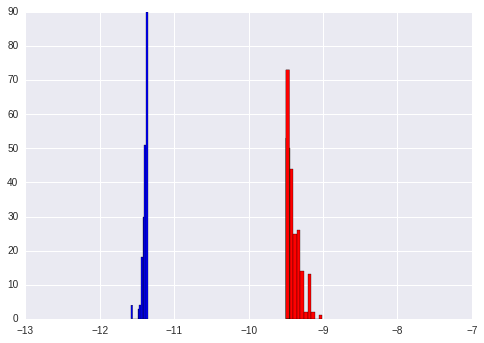

In [46]:
figure()
hist(plotSubsetData[plotSubsetData.source=='x-fn_poly'].f_poly,color='green')

hist(plotSubsetData[plotSubsetData.source=='x-fn_poly'].n_poly,color='red')

hist(plotSubsetData[plotSubsetData.source=='x-fn_poly'].x_poly,color='blue')
xlim(-13,-7)

(-13, -7)

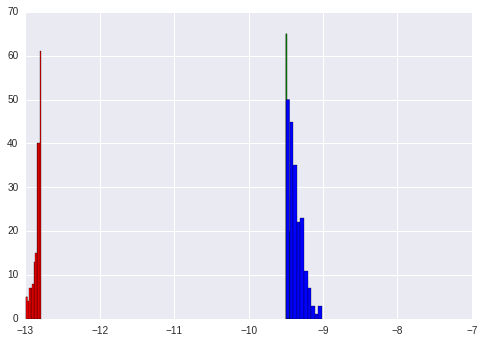

In [94]:
figure()
hist(plotSubsetData[plotSubsetData.source=='n-xf_poly'].f_poly,color='green')

hist(plotSubsetData[plotSubsetData.source=='n-xf_poly'].n_poly,color='red')

hist(plotSubsetData[plotSubsetData.source=='n-xf_poly'].x_poly,color='blue')
xlim(-13,-7)